In [1]:
# Explore the following questions. Include a hypothesis, test assumptions, 
# and provide valid findings from the data.

# As you are conducting the analysis, consider what other variables may be accounting for any 
# significant differences that you find.

# 1) Do homes with air conditioning have a higher sales price than homes without air conditioning?
#         - Hypothesis: Homes with AC do have a significantly higher sales price
#           than homes without AC
        
# 2) Do homes with a full basement have a higher sales price than homes without a full basement?
#         - Hypothesis: There is no significant difference between homes with basements and homes\
#           without basements

In [2]:
import pandas as pd
import numpy as np

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
home_data = pd.read_csv('data/homeprices.applied.econ.csv')
home_data.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


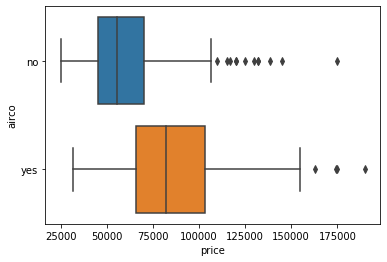

In [4]:
sns.boxplot(x="price", y="airco", data=home_data)
plt.show()

In [5]:
air = home_data[home_data['airco'] == 'yes']
no_air = home_data[home_data['airco'] == 'no']

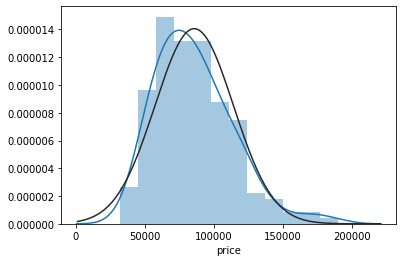

In [6]:
sns.distplot(air['price'], fit=stats.norm)
plt.show()

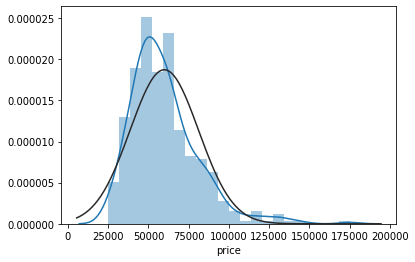

In [7]:
sns.distplot(no_air['price'], fit=stats.norm)
plt.show()

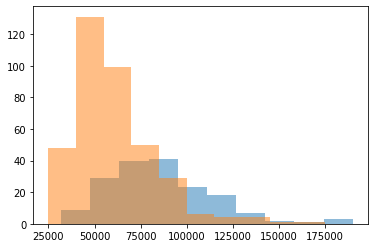

In [8]:
plt.hist(air['price'], alpha=0.5)
plt.hist(no_air['price'], alpha=0.5)
plt.show()

In [9]:
stats.describe(air['price'])

DescribeResult(nobs=173, minmax=(31900.0, 190000.0), mean=85880.58959537573, variance=810167352.2317516, skewness=0.8558523643779228, kurtosis=0.9609338749117713)

In [10]:
stats.describe(no_air['price'])

DescribeResult(nobs=373, minmax=(25000.0, 175000.0), mean=59884.85254691689, variance=455341800.98626363, skewness=1.4196100209360347, kurtosis=3.448225770991252)

In [11]:
t, p = stats.ttest_ind(air['price'], no_air['price'])
print(t)
print(p)

11.862852780650169
4.972721571759431e-29


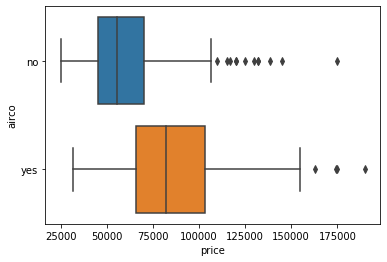

In [12]:
sns.boxplot(x="price", y="airco", data=home_data)
plt.show()

In [13]:
base = home_data[home_data['fullbase'] == 'yes']
no_base = home_data[home_data['fullbase'] == 'no']

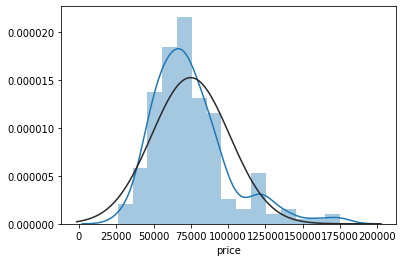

In [14]:
sns.distplot (base['price'], fit=stats.norm)
plt.show()

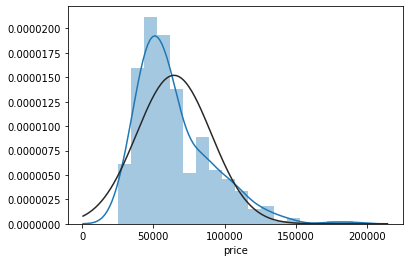

In [15]:
sns.distplot (no_base['price'], fit=stats.norm)
plt.show()

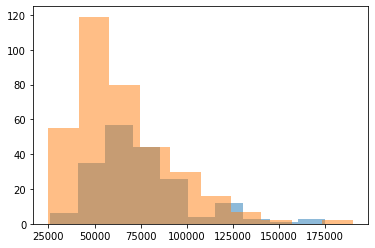

In [16]:
plt.hist(base['price'], alpha=0.5)
plt.hist(no_base['price'], alpha=0.5)
plt.show()

In [17]:
stats.describe(base['price'])

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)

In [18]:
stats.describe(no_base['price'])

DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)

In [19]:
t, p = stats.ttest_ind(base['price'], no_base['price'])
print(t)
print(p)

4.420628512286621
1.1885626562866786e-05


In [20]:
def calc_95_ci(x1, x2):
    signal = x1.mean() - x2.mean()
    noise = np.sqrt(x1.var() / len(x1) + x2.var() / len(x2))

    ci_lo = signal - 1.96 * noise
    ci_hi = signal + 1.96 * noise

    return (ci_lo, ci_hi)

In [21]:
calc_95_ci(air['price'], no_air['price'])

(21233.379166974857, 30758.09492994282)

In [22]:
calc_95_ci(base['price'], no_base['price'])

(5801.544262762097, 15032.294775656886)

In [23]:
# Based on the data, there is a very significant difference between homes with
# AC and homes without AC.  Homes with AC have a significantly higher home price.
# The data distribution is normal, and the p-value is very low.

# Based on the data, there is a small significant difference between homes with
# a basement and homes without a basement.  Homes with a basement have a slightly higher home price.
# The data distribution is normal, and the p-value is low.